# Correlation, Adjustment , Prediction, Performance

#### Libraries

The scipy.optimize package provides several commonly used optimization algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

### 1-Dimensional Case

#### Creation of DataFrame and Modelation

In [2]:
db = pd.DataFrame()

#### Independent - Dependent relationship

In [3]:
independent = [x for x in range(10,50)]

Example Relationship:

$f(x) = 100e^{\frac{-x}{10}} + \epsilon$ 

where $\epsilon \sim N(\mu,\sigma)$

In [4]:
hidden_relation = lambda x: 100*np.exp(-x/10)

In [5]:
#given the independent set and the hidden relationship, the dependent set is created using random numbers to add chaos.
dependent = [hidden_relation(x) + np.random.normal(0,5) for x in independent]

In [6]:
#hidden_relation without randomness
perfect_curve = [hidden_relation(x) for x in independent]

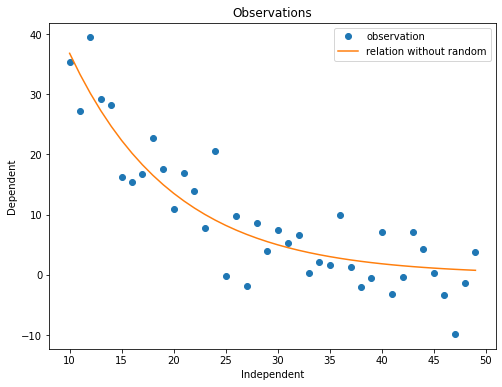

In [7]:
plt.figure(figsize = (8,6))
plt.title('Observations')
plt.xlabel('Independent')
plt.ylabel('Dependent')
plt.plot(independent,dependent,'o',label='observation')
plt.plot(independent,perfect_curve,'-',label='relation without random')
plt.legend()
plt.show()

#### Curve Fit

Proposed fit curve for observations.
The paramaters will be selected as optimal when they mimimize $R^{2}$

The proposed relation for this example is:

$f(x) = a e^{-\frac{x}{b}} + c$

In [8]:
proposed_fit = lambda x,a,b,c : a*np.exp(-x/b) + c

we fit the curve using the curve_fit function

In [9]:
popt, pcov = curve_fit(proposed_fit, independent, dependent)

In [10]:
print(popt)

[87.40315644 11.9815234  -2.05554309]


In [11]:
print(pcov)

[[298.90663111 -42.93810833  29.32883109]
 [-42.93810833   7.28011637  -5.98444873]
 [ 29.32883109  -5.98444873   6.31629783]]


standard deviation errors on the parameters

In [12]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[17.28891642  2.69816908  2.51322459]


#### Figure 1 - Plotting method: matplotlib

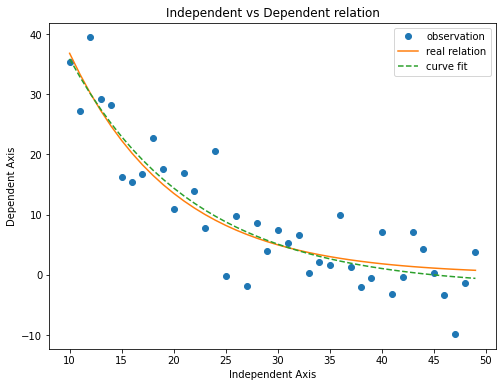

In [13]:
plt.figure(figsize = (8,6))
plt.title('Independent vs Dependent relation')
plt.xlabel('Independent Axis')
plt.ylabel('Dependent Axis')
plt.plot(independent,dependent,'o',label='observation')
plt.plot(independent,perfect_curve,'-',label='real relation')
plt.plot(independent,proposed_fit(np.array(independent),*popt),'--',label='curve fit')
plt.legend()
plt.show()

#### Predictions

In [14]:
def predict(x,proposed_fit,popt):
    return proposed_fit(x,*popt)

Intervalos de Confianza

Nota: Agregar intervalos de confianza de la media.

In [15]:
pcov

array([[298.90663111, -42.93810833,  29.32883109],
       [-42.93810833,   7.28011637,  -5.98444873],
       [ 29.32883109,  -5.98444873,   6.31629783]])

In [16]:
np.diagonal(pcov)

array([298.90663111,   7.28011637,   6.31629783])

In [17]:
sigma = np.sqrt(np.diagonal(pcov))

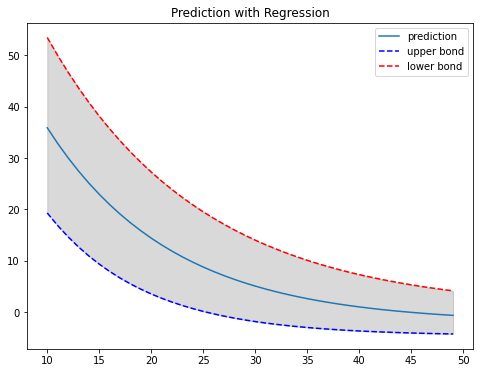

In [18]:
plt.figure(figsize = (8,6))
plt.title('Prediction with Regression')
plt.plot(independent,predict(np.array(independent),proposed_fit,popt),label='prediction')
upper_bond = predict(np.array(independent),proposed_fit,popt-sigma)
lower_bond = predict(np.array(independent),proposed_fit,popt+sigma)
plt.plot(independent,upper_bond,'b--',label='upper bond')
plt.plot(independent,lower_bond,'r--',label='lower bond')
plt.fill_between(independent, lower_bond, upper_bond,color = 'black', alpha = 0.15)
plt.legend()
plt.show()

#### Performance

Performance specifications

In [19]:
thresholds = [30,10]
grade = [0,0.5,1]
typ = 'down'

Performance function

In [20]:
def performance(x,thresholds,grade,typ):
    
    found = False
    
    if typ == 'down':
        if x >= thresholds[0]:
            found = True
            token = grade[0]
        if not found:
            for i in range(len(thresholds)-1):
                if x < thresholds[i] and x >= thresholds[i+1]:
                    found = True
                    token = grade[i+1]
        if not found:
            token = grade[-1]
        
    elif typ == 'up':
        if x <= thresholds[0]:
            found = True
            token = grade[0]
        if not found:
            for i in range(len(thresholds)-1):
                if x > thresholds[i] and x <= thresholds[i+1]:
                    found = True
                    token = grade[i+1]
        if not found:
            token = grade[-1]
                
    return token

In [21]:
performance(11,thresholds,grade,'down')

0.5

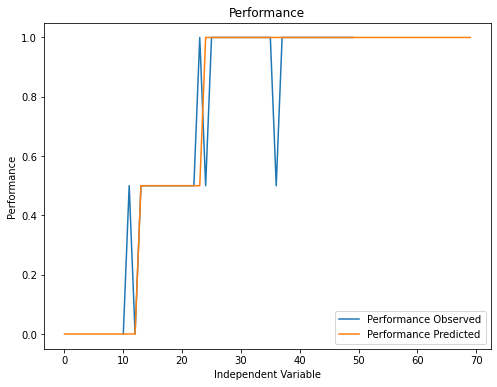

In [25]:
performance_observed = [performance(x,thresholds,grade,'down') for x in dependent]

independent_future = np.array(range(70))
dependent_prediction = predict(independent_future,proposed_fit,popt)
performance_predicted = [performance(x,thresholds,grade,'down') for x in dependent_prediction]

plt.figure(figsize = (8,6))
plt.title('Performance')
plt.xlabel('Independent Variable')
plt.ylabel('Performance')
plt.plot(independent,performance_observed,label='Performance Observed')
plt.plot(independent_future,performance_predicted,label='Performance Predicted')
plt.legend()
plt.show()

### Multiple Regions Approach

Dataframes for 3 main indicators

In [367]:
independent = pd.DataFrame()
dependent = pd.DataFrame()
population = pd.DataFrame()

Observational time

In [368]:
obs_size = 15

#### Independent

<AxesSubplot:>

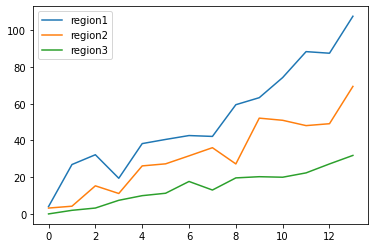

In [369]:
independent['region1'] = [x + np.random.normal(0,10) for x in np.linspace(10,100,obs_size-1)]
independent['region2'] = [x + np.random.normal(0,5) for x in np.linspace(5,60,obs_size-1)]
independent['region3'] = [x + np.random.normal(0,2) for x in np.linspace(2,30,obs_size-1)]

independent.plot()

#### Dependent

In [370]:
real_relationships = {
    'region1': lambda x: 100*np.exp(-x/10) + 2,
    'region2': lambda x: 80*np.exp(-x/5) + 2,
    'region3': lambda x: 80*np.exp(-x/5) + 3
}

<AxesSubplot:>

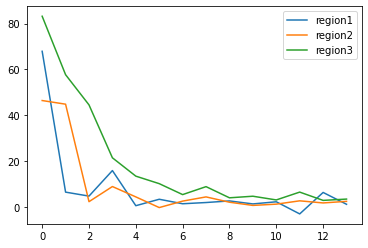

In [371]:
dependent['region1'] = [real_relationships['region1'](x) + np.random.normal(0,2) for x in independent['region1']]
dependent['region2'] = [real_relationships['region2'](x) + np.random.normal(0,3) for x in independent['region2']]
dependent['region3'] = [real_relationships['region3'](x) + np.random.normal(0,1) for x in independent['region3']]

dependent.plot()

#### Relationship

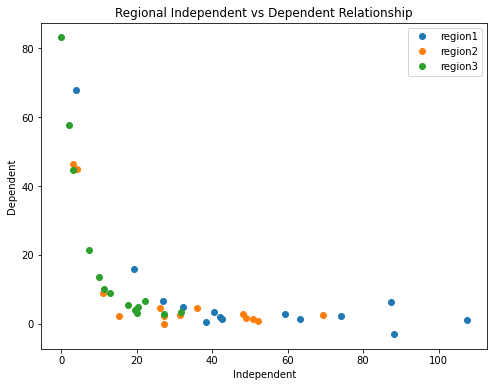

In [372]:
plt.figure(figsize=(8,6))
plt.title('Regional Independent vs Dependent Relationship')
plt.xlabel('Independent')
plt.ylabel('Dependent')
for region in independent.columns:
    plt.plot(independent[region],dependent[region],'o',label=region)
plt.legend()
plt.show()

#### Regression

In [373]:
proposed_fits = {
    'region1': lambda x,a,b,c: a*np.exp(-x/b) + c,
    'region2': lambda x,a,b,c: a*np.exp(-x/b) + c,
    'region3': lambda x,a,b,c: a*np.exp(-x/b) + c
}

In [374]:
dependent_fit = {}
for region in proposed_fits.keys():
    popt, pcov = curve_fit(proposed_fits[region], independent[region], dependent[region])
    dependent_fit[region] = {
        'popt': popt,
        'pcov': pcov
    }

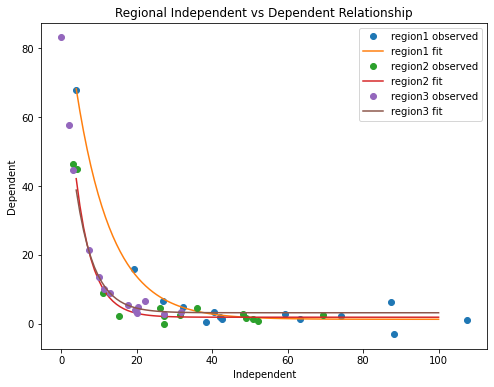

In [377]:
plt.figure(figsize=(8,6))
plt.title('Regional Independent vs Dependent Relationship')
plt.xlabel('Independent')
plt.ylabel('Dependent')
for region in independent.columns:
    plt.plot(independent[region],dependent[region],'o',label=f'{region} observed')
    plt.plot(np.linspace(4,100,100),proposed_fits[region](np.linspace(4,100,100),*dependent_fit[region]['popt']),label=f'{region} fit')
plt.legend()
plt.show()

#### Population

In [36]:
population_dynamics = {
    'region1': lambda x: x + (0.1 + np.random.normal(0,0.05))*x,
    'region2': lambda x: x + (0.15 + np.random.normal(0,0.05))*x,
    'region3': lambda x: x + (0.07 + np.random.normal(0,0.02))*x
}

In [38]:
initial_population = {
    'region1': 100,
    'region2': 75,
    'region3': 80
}

population_total = {
    'region1': [],
    'region2': [],
    'region3': []
}

#add initial population to population total
for region in population_dynamics.keys():
    population_total[region].append(initial_population[region])

#simulation time
n = 20

#simulation
for i in range(n):
    for region in population_dynamics.keys():
        y = population_dynamics[region](population_total[region][i])
        population_total[region].append(y)

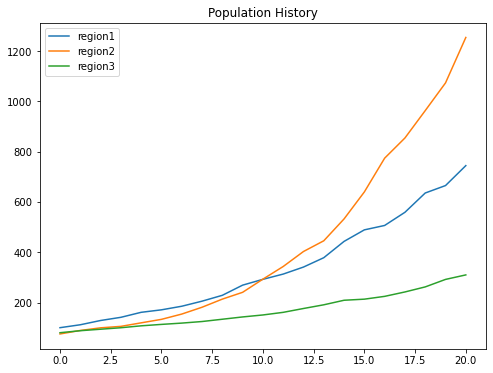

In [42]:
plt.figure(figsize = (8,6))
plt.title('Population History')

for region in population_total.keys():
    plt.plot(range(len(population_total[region])),population_total[region],label=f'{region}')

plt.legend()
plt.show()

In [44]:
population_growth = {
    'region1': [],
    'region2': [],
    'region3': []
}

for i in range(n-1):
    for region in population_total.keys():
        y = population_total[region][i+1]/population_total[region][i]
        population_growth[region].append(y)

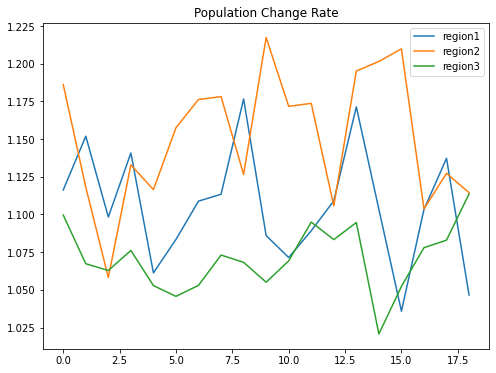

In [45]:
plt.figure(figsize = (8,6))
plt.title('Population Change Rate')

for region in population_growth.keys():
    plt.plot(range(len(population_growth[region])),population_growth[region],label=f'{region}')

plt.legend()
plt.show()